# LAB 03 - Data Preprocessing 1

## #04. 데이터 정제 (2) - Outlier

In [ ]:
# 이상치 판단기준
    # 1. 분석가의 주관에 맡기기 (박사학위 이상 아니면 추천안함)
    # 2. 통계적 기준 - ESD (Extreme Studentized Deviation)
        # 상,하위 0.3% or 표준편차 ±3 에 해당하는 값
        # 데이터가 정규분포 따른다는 가정하게 쓰는 방법 -> 비추
    # 3. 상자그림 (Box Plot): 시각화자료
        # 정규분포 따름 유무에 상관없이 사용가능 - 보편적으로 씀
        # 사분위수(iqr)를 계산한 결과에 의해 중심에서 크게 벗어난 값
        # 그림에서 outlier가 원으로 표시됨

### 이상치 검출방법 - 상자그림 (추천!!!!)

In [ ]:
# 상자그림의 iqr, 상한값/하한값: 계산 필요
    # iqr = Q3 - Q1
    # Q1 - 1.5 x iqr < data < Q3 + 1.5 x iqr

In [2]:
# 상한치, 하한치 관련 내장함수 없음
# -> outlier 처리할 때 마다 계산식 적어야됨 (외워놓기)

# iqr: 사분위 수 구간
# 상한치, 하한치: 실제 존재하는 값 x! 계산값임!

### 이상치 정제 프로세스

In [ ]:
# 1. 결측치 정제를 우선적으로 수행 
    # ∵ 바로 다음에 수행될 oulier finding에 영향 안주기 위함
# 2. 이상치 찾기 - by 상자그림
# 3. 이상치를 결측치(NaN)로 변경
# 4. 이상치로부터 만들어진 결측치 정제하기

### #01. 준비작업 - 라이브러리 참조

In [1]:
# 상자 그림을 위해 matplotlib 패키지 설치 ㄱㄱ
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [ ]:
# 1. 데이터 가져오기:
origin = load_data("ref_sample")
origin

[data] https://data.hossam.kr/data/lab03/ref_sample.xlsx
[desc] 데이터 정제를 위한 실습용 데이터
[!] Cannot read metadata


,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


### #02. 결측치 정제하기

In [4]:
# 1. 결측치를 평균으로 대체:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr, index = origin.index, columns = origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


### #03. 이상치가 존재하는 변수 확인

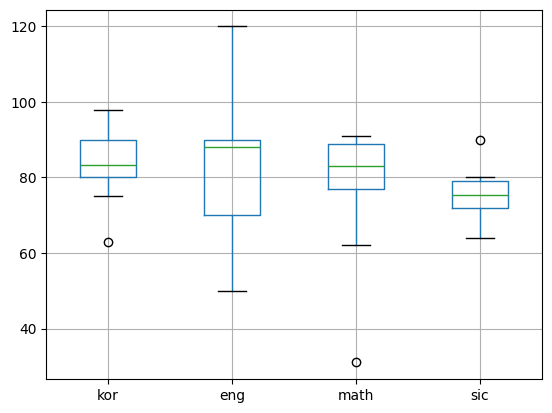

In [7]:
# 1. 상자그림 확인하기:
re_df.boxplot()
plt.show()
    # kor, math, sic에 이상치가 있음이 확인될거임

### #04. 분석가의 주관에 의한 이상치 판별

In [10]:
# 1. 이상치를 결측치로 변경:
re_df.loc[re_df['eng'] > 100, 'eng'] = np.nan
re_df
    # 점수가 아무리 낮더라도 정상 범위(0~100)라면 답안지를
    # 밀려썼거나 시험 중 실수가 발생했다고 넘어갈 수 있음.
    # -> 이 경우는 정상적인 시험 결과로 간주하는 것이 옳다고 판단.
    # but 정상범위를 벗어난 경우라면 채점에 오류가 있을 수 있다고 판단하여
    # 이상치로 판별해야 한다.

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


In [11]:
# 2. 변경된 결측치에 대한 처리:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr, index = re_df.index, columns = re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


### #05. 극단치 경계값을 계산하여 이상치 찾기

In [ ]:
# 1. 사분위간 범위 계산:
# iqr = Q3 - Q1
outline_df2 = outline_df.copy()
국어Q1 = outline_df2['kor'].quantile(0.25)
국어Q3 = outline_df2['kor'].quantile(0.75)
국어iqr = 국어Q3 - 국어Q1
print("국어 점수의 사분위 간 범위:", 국어iqr)

국어 점수의 사분위 간 범위: 10.0


In [16]:
# 2. 극단치 경계값 찾기:
outline_max = 국어Q3 + 국어iqr * 1.5
outline_min = 국어Q1 - 국어iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

상한 극단치 경계: 105.0
하한 극단치 경계: 65.0


In [17]:
# 3. 극단치 경계값을 활용한 이상치 확인

# 1) 하한 이상치 확인:
outline_df2.loc[outline_df2['kor'] < outline_min, 'kor']

name
수현    63.0
Name: kor, dtype: float64

In [18]:
# 3. 극단치 경계값을 활용한 이상치 확인

# 2) 하한 이상치를 결측치로 변환:
outline_df2.loc[outline_df2['kor'] < outline_min, 'kor'] = np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [20]:
# 3. 극단치 경계값을 활용한 이상치 확인

# 2) 상한 이상치를 결측치로 변환:
outline_df2.loc[outline_df2['kor'] > outline_max, 'kor'] = np.nan
outline_df2
    # 여기서는 국어 점수의 상한이상치는 없긴 한데
    # 코드의 형식을 설명하기 위해서 적은거임

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [ ]:
# 4. 극단치 경계값을 활용한 이상치 확인

# 1) 수학 점수에 대한 처리:
    # 상자 그림으로 확인했을 때, 영어에 대한 이상치는 없었으므로 수학과 과학에 대해서만 처리한다.
수학Q1 = outline_df2['math'].quantile(0.25)
수학Q3 = outline_df2['math'].quantile(0.75)
수학iqr = 수학Q3 - 수학Q1
outline_max = 수학Q3 + 수학iqr * 1.5
outline_min = 수학Q1 - 수학iqr * 1.5

outline_df2.loc[outline_df2['math'] < outline_min, 'math'] = np.nan
outline_df2.loc[outline_df2['math'] < outline_min, 'math'] = np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [23]:
# 4. 극단치 경계값을 활용한 이상치 확인

# 1) 과학 점수에 대한 처리:
과학Q1 = outline_df2['sic'].quantile(0.25)
과학Q3 = outline_df2['sic'].quantile(0.75)
과학iqr = 과학Q3 - 과학Q1
outline_max = 과학Q3 + 과학iqr * 1.5
outline_min = 과학Q1 - 과학iqr * 1.5

outline_df2.loc[outline_df2['sic'] < outline_min, 'sic'] = np.nan
outline_df2.loc[outline_df2['sic'] < outline_min, 'sic'] = np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [24]:
# 5. 마지막 단계: 결측치로 변환된 값을 처리하자:
imr = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_imr = imr.fit_transform(outline_df2.values)
final_df = DataFrame(df_imr, index = outline_df2.index, 
                     columns = outline_df2.columns)
final_df

,kor,eng,math,sic
name,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,90.000000
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000
